## Identificar fronteras no lineales

In [2]:
## importamos una librería para poder crear datasets con informacion radial
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
import numpy as np

c:\Users\Golfa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
## creamos las muestras de tipo radial
X, Y=make_circles(200, factor=.1, noise=.1)

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

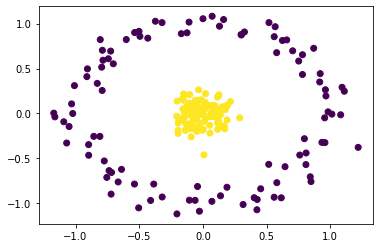

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [6]:
## crear un modelo linear support vector classifier, modelo lineal de clasificación de vectores
from sklearn.svm import SVC
modelo=SVC(kernel="linear")
## pasamos los datos de entrenamiento y el resultado esperado
modelo.fit(X,Y)

SVC(kernel='linear')

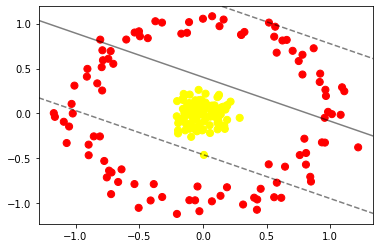

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [8]:
## función gaussiana
r=np.exp(-(X**2).sum(1))

In [10]:
## esto sería las alturas de cada punto
r

array([0.97536847, 0.45255457, 0.4501344 , 0.37900719, 0.33686351,
       0.91583614, 0.98539981, 0.35357438, 0.34357995, 0.29852564,
       0.25872811, 0.95911397, 0.28284745, 0.80720344, 0.97257596,
       0.49031375, 0.46404938, 0.35202423, 0.95524339, 0.93774738,
       0.94099442, 0.96755528, 0.95413335, 0.99159782, 0.9995964 ,
       0.99329051, 0.99669343, 0.32296938, 0.98399826, 0.98710411,
       0.38246596, 0.36556213, 0.99401039, 0.99231912, 0.95618404,
       0.96863545, 0.96476061, 0.97478428, 0.33305303, 0.4272178 ,
       0.37897347, 0.97749189, 0.26387668, 0.30063538, 0.42559488,
       0.99240935, 0.94290158, 0.99748682, 0.32848818, 0.3764467 ,
       0.25612125, 0.98962986, 0.99975516, 0.99350534, 0.34031477,
       0.98370032, 0.38745253, 0.98672738, 0.40019489, 0.98566829,
       0.97672691, 0.39357171, 0.97478889, 0.99628419, 0.97991955,
       0.99775803, 0.96900739, 0.98282211, 0.99522367, 0.98948217,
       0.96093153, 0.39480765, 0.99350501, 0.39592066, 0.35186

In [11]:
## importamos una librería 3d
from mpl_toolkits import mplot3d

In [12]:
def plot_3D(X, Y, elev=30, azim=30):
    ax=plt.subplot(projection="3d")
    ax.scatter(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.set_zlabel("r")

In [13]:
from ipywidgets import interact, fixed

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90],
azim=[-180,-150, -120, -60, -30, 0, 30,60,90,120,150,180])